# k-NN Algorithm Implementation and Analysis
This notebook implements the k-NN algorithm from scratch, exploring and optimizing critical parameters.

## 1. Data Loading and Exploration

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv(r'dataset/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. Data Preprocessing

In [14]:


X = data.drop(columns=['target'])
y = data['target']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

## 3. Statistical Analysis and Visualizations

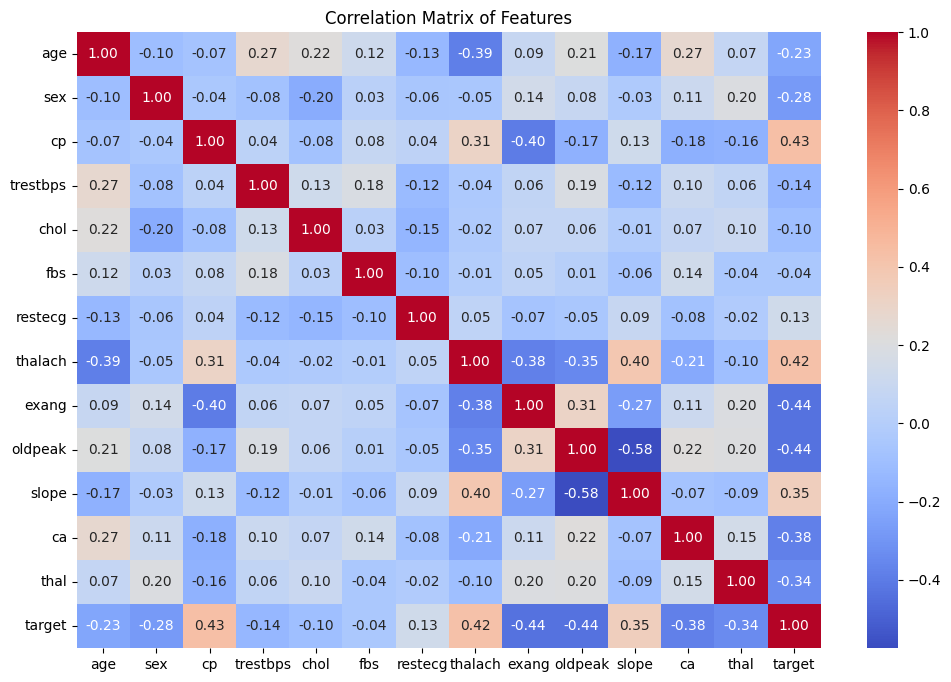

In [15]:


plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_13560\503477983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


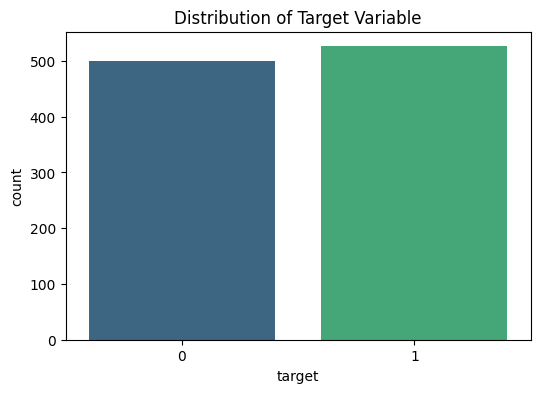

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribution of Target Variable')
plt.show()

## 4. k-NN Algorithm Implementation

In [17]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3, distance_metric='euclidean', weight='uniform'):
        self.k = k
        self.distance_metric = distance_metric
        self.weight = weight

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        if self.weight == 'uniform':
            most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

## 5. Model Evaluation

In [18]:

k_values = [1, 3, 5, 7, 9, 11, 15]
results = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    
    results.append({
        'k': k,
        'accuracy': accuracy,
        'precision_0': report['0']['precision'],
        'recall_0': report['0']['recall'],
        'f1_score_0': report['0']['f1-score'],
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_score_1': report['1']['f1-score']
    })

results_df = pd.DataFrame(results)

results_df


,k,accuracy,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1
0,1,0.985366,0.971429,1.000000,0.985507,1.000000,0.970874,0.985222
1,3,0.936585,0.949495,0.921569,0.935323,0.924528,0.951456,0.937799
2,5,0.834146,0.877778,0.774510,0.822917,0.800000,0.893204,0.844037
3,7,0.839024,0.879121,0.784314,0.829016,0.807018,0.893204,0.847926
4,9,0.853659,0.882979,0.813725,0.846939,0.828829,0.893204,0.859813
5,11,0.824390,0.830000,0.813725,0.821782,0.819048,0.834951,0.826923
6,15,0.800000,0.835165,0.745098,0.787565,0.771930,0.854369,0.811060
